# Cleaning Process

Before we start, we must explore the data, to adapt them so that we can use them in the models.

We have two Datasets, one of them (df_train), has the predictor variables, and the target variable. The other one (df_test) will be used as new data, since it does not have a target variable, and our model has to predict it.

## Clean Train

First of all, import the libraries we are going to use.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import unzip_zip
import statsmodels.formula.api as smf

Using the `unzip_zip` function contained in `utils.py` in the folder `src`, we unzip the `.csv` files and load them into a Dataframe.

We save the DataFrames in variables.

In [2]:
#unzip and read csv
df_train = unzip_zip("data/diamonds-datamad0121.zip", "train.csv")
df_test = unzip_zip("data/diamonds-datamad0121.zip", "test.csv")

Now, let's check the DataFrame

In [3]:
#check data
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [4]:
#check the number of columns and rows
df_train.shape

(40455, 11)

In [5]:
#check the columns
df_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
#check types
df_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

As a first action, we will delete the `id` column because it does not give us any relevant information about the diamonds.

In [7]:
#drop columns: id -> Useless
df_train = df_train.drop(["id"], axis=1)

In [8]:
#check data
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


Now, let's check the values of the `object` type features.

In [9]:
#check uniques
df_train.clarity.unique()

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [10]:
df_train.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [11]:
df_train.color.unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

Going deeper into the diamond information, we have seen that the values of the three features (`clarity`, `cut`, and `color`) have a scale, that is, they follow an order.

Therefore, our strategy for converting these features to numerical is a hand encoding. By setting values from $1$ -> smallest value, to $n$ -> largest value.

We create dictionaries where the keys are the categorical value and the values are the numerical values that we assign to them.

In [12]:
#review diamond documentation and see that there 
#is numerical order in the categorical features. Encode the categorical features by numerical features.
encoding_cut =  {"Fair":1, "Good":2, 
          "Ideal":3, "Very Good":4, "Premium":5}
    
    
encoding_color = {'E':1,'D':2,'F':3,
             'G':4,'H':5,'I':6,
             'J':7}

encoding_clarity = {'I1':1,'SI2':2,
               'SI1':3,'VS2':4,'VS1':5,
               'VVS2':6,'VVS1':7,'IF':8}

Using the `.apply` method we apply a `lambda` function in which we change the categorical value by the numerical value to each column.

And store the numeric value in the DataFrame column to replace the values.

In [13]:
#replace categorical variables with numerical variables
df_train["cut"] = df_train["cut"].apply(lambda x: encoding_cut[x])
df_train["color"] = df_train["color"].apply(lambda x: encoding_color[x])
df_train["clarity"] = df_train["clarity"].apply(lambda x: encoding_clarity[x])

In [14]:
df_train.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.062156,0.289227,-0.350899,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
cut,0.062156,1.000000,0.020787,-0.041586,-0.275140,0.242985,0.073185,0.065893,0.034131,0.059406
color,0.289227,0.020787,1.000000,0.016655,0.044665,0.024083,0.269491,0.263042,0.265130,0.159381
clarity,-0.350899,-0.041586,0.016655,1.000000,-0.062659,-0.162142,-0.370347,-0.356866,-0.363034,-0.212762
depth,0.025089,-0.275140,0.044665,-0.062659,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,0.182590,0.242985,0.024083,-0.162142,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,0.974516,0.073185,0.269491,-0.370347,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,0.950563,0.065893,0.263042,-0.356866,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,0.947930,0.034131,0.265130,-0.363034,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157
price,0.920878,0.059406,0.159381,-0.212762,-0.000924,0.158128,0.957653,0.934700,0.930157,1.000000


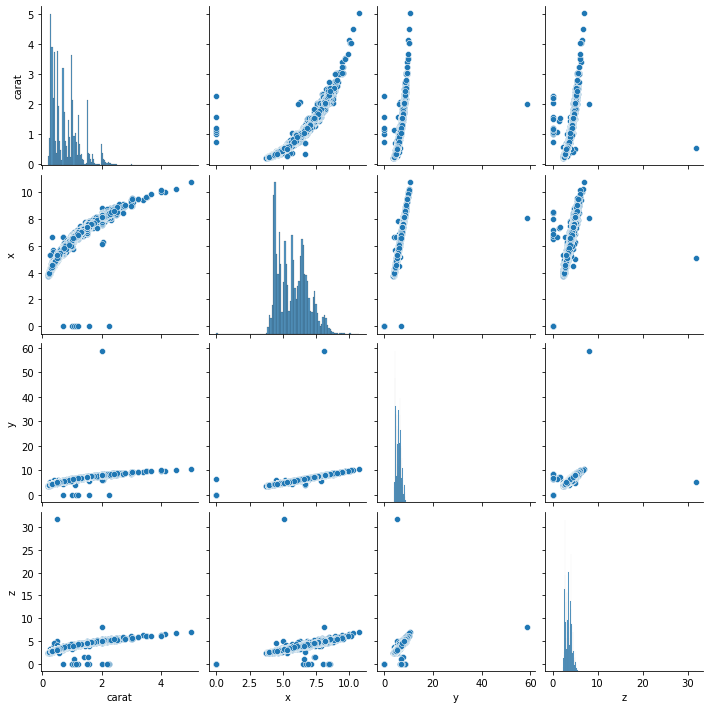

In [15]:
sns.pairplot(df_train[["carat", "x", "y", "z"]], palette="set2")

By means of `ols` we will check the influence of the features on the target feature.

In [16]:
#Let's get the summary of the metrics.
#Set 'price' as target variable, and the rest as predictors variables. And, them, fit the model.
train_results = smf.ols(
    "price ~ carat + cut + color + clarity + depth + table + x + y + z",
    data=df_train).fit()
#We see the summary
train_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.130e+05
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:00:33   Log-Likelihood:                 8045.6
No. Observations:               40455   AIC:                        -1.607e+04
Df Residuals:                   40445   BIC:                        -1.599e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5400      0.070    -21.989      0.000      -1.677      -1.403
carat         -0.6100      0.010    -63.207      0.000      -0.629      -0.591
cut            0.0074      0.001      7.469      0.000       0.005       0.009
color         -0.0721      0.001   -122.497      0.000      -0.073      -0.071
clarity        0.1173      0.001    177.315      0.000       0.116       0.119
depth          0.0428      0.001     50.631      0.000       0.041       0.044
table         -0.0006      0.000     -1.159      0.246      -0.002       0.000
x              1.1490      0.006    181.379      0.000       1.137       1.161
y              0.0402      0.004     10.552      0.000       0.033       0.048
z              0.0392      0.006      6.463      0.000       0.027       0.051
==============================================================================
Omnibus:                    75130.470   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        605187869.127
Skew:                          13.334   Prob(JB):                         0.00
Kurtosis:                     601.596   Cond. No.                     6.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, the `R-squared` label has a value of `0.962`. `R-squared` is the percentage of variation of the target variable that explains its relationship with one or more predictor variables. This value is between $0$ and $1$, and the closer to $1$ the better the fit of the model to data.

In the $P>|t|$ tag of the `table` feature it exceeds $0.05$ so, therefore, this feature does not give us information regarding the target variable.

So, we proceed to drop the `table` feature.

In [17]:
#drop "table" column
df_train = df_train.drop("table", axis=1)

We check if `R-squared` has been changed.

In [18]:
#chek metrics
train_results = smf.ols(
    "price ~ carat + cut + color + clarity + depth + x + y + z",
    data=df_train).fit()
train_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.272e+05
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:00:33   Log-Likelihood:                 8044.9
No. Observations:               40455   AIC:                        -1.607e+04
Df Residuals:                   40446   BIC:                        -1.599e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5861      0.058    -27.530      0.000      -1.699      -1.473
carat         -0.6104      0.010    -63.311      0.000      -0.629      -0.592
cut            0.0072      0.001      7.378      0.000       0.005       0.009
color         -0.0721      0.001   -122.492      0.000      -0.073      -0.071
clarity        0.1174      0.001    178.839      0.000       0.116       0.119
depth          0.0431      0.001     52.397      0.000       0.041       0.045
x              1.1489      0.006    181.389      0.000       1.136       1.161
y              0.0404      0.004     10.593      0.000       0.033       0.048
z              0.0393      0.006      6.476      0.000       0.027       0.051
==============================================================================
Omnibus:                    75126.423   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        605125108.949
Skew:                          13.332   Prob(JB):                         0.00
Kurtosis:                     601.565   Cond. No.                     3.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that it has exactly the same value, so the deleted variable did not explain anything with respect to the target variable.

We save the cleaned DataFrame in a `.csv` file.

In [19]:
#convert to .csv
df_train.to_csv("input/train_clean.csv", header=True, index=False)

## Clean Test

We will do the same process above with the `df_test` DataFrame.

In [20]:
#same process
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.05,Premium,H,SI1,61.9,58.0,6.50,6.45,4.01
13481,13481,0.32,Ideal,F,VS2,62.1,57.0,4.35,4.38,2.71
13482,13482,0.41,Premium,J,VS1,61.3,59.0,4.78,4.74,2.92
13483,13483,0.30,Premium,G,VVS2,62.2,59.0,4.31,4.28,2.67


In [21]:
df_test.shape

(13485, 10)

In [22]:
df_test.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [23]:
df_test.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [24]:
df_test = df_test.drop(["id", "table"], axis=1)

In [25]:
df_test["cut"] = df_test["cut"].apply(lambda x: encoding_cut[x])
df_test["color"] = df_test["color"].apply(lambda x: encoding_color[x])
df_test["clarity"] = df_test["clarity"].apply(lambda x: encoding_clarity[x])

In [26]:
df_test.to_csv("input/test_clean.csv", header=True, index=False)